<div>
<img src="https://nci.org.au/sites/default/files/logos/Logo-NCI.svg" width="300" align="left"/>
</div>


## Requesting National Geophysical Compilations map images through NCI's GSKY Data Server
NCI's GSKY Data Server supports the Open Geospatial Consortium (OGC) Web Map Service (WMS), which is a standard protocol for serving geospatial data as images (e.g., PNG).   

**Constructing WMS Requests**

To request a spatial subset of data through GSKY using WMS, a **GetMap** URL defining the subset has to be constructed. Then this URL can be used within a web browser to communicate to the GSKY Data Server, which will return the requested map image of the subset. 

For example, the **GetMap** request takes the following form:

`http://gsky.nci.org.au/ows/national_geophysical_compilations`?
<br>
`service =` WCS
<br>
`&version =` 1.0.0
<br>
`&request =` GetCoverage
<br>
`&coverage =` value 
<br>
`&format =` value
<br>
`&bbox =`value
<br>
`&time =`value
<br>
`&crs =`value
<br>

#### GetMap parameters:

|Parameter    |  Required/Optional  |  Input                                                            |
|-------------|:-------------------:|------------------                                                 |
|service      |     Required        |      WMS                                                          |
|version      |     Required        |  `1.1.1**`, `1.3.0 (default)`                                     |
|request      |     Required        | `GetMap`                                                          |
|layers       |     Required        | `<variable>`                                                      |
|crs          |     Required        | `<crs_value>`                                                     |
|styles       |     Required        | `<style_name>`                                                    |
|format       |     Required        | `image/png `, `image/png;mode=32bit `, `image/gif `, `image/jpeg `|
|bbox         |     Required        | `<ymin,xmin,ymax,xmax>`                                           |
|width        |     Required        | Image width in pixels                                             |
|height       |     Required        | Image height in pixels                                            |
|colorscalerange |  Optional        | `<min,max>`                                                       |
|transparent  |     Optional        | True, False                                                       |
|time         |     Optional        | `<time_value>`                                                    |





`**`**Syntax differences for v1.1.1 GetMap requests:**
- Use `srs` in place of `crs`
- The order of `bbox` values is: `<xmin,ymin,xmax,ymax>`


<br>

**WMS GetCapabilities Request**

In order to contruct the **GetMap** URL, a **GetCapabilities** request can be made to the server. This requests returns a xml describing the available WMS parameters (metadata, services, and data) made available by NCI's GSKY server. 

**GetCapabilities example:**

> [http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WMS&version=1.3.0&request=GetCapabilities<br/>](http://gsky.nci.org.au/ows/national_geophysical_compilations?service=WMS&version=1.3.0&request=GetCapabilities)


**GetMap Request**
Using the information returned from a GetCapabilities request, a GetMap URL can be constructed and then entered into the address bar of any web browser.  

**Example GetMap request:**

> [http://gsky.nci.org.au/ows/national_geophysical_compilations?<br/>
service=WMS&<br/>
layers=gravmap2016_grid_grv_cscba&<br/>
service=WMS&<br/>
crs=EPSG:4326&<br/>
format=image/png&<br/>
request=GetMap&<br/>
height=512&<br/>
width=512&<br/>
version=1.3.0&<br/>
bbox=-47,113,-11,153&<br/>
time=2019-08-29T00:00:00.000Z&<br/>
transparent=FALSE
](http://gsky.nci.org.au/ows/national_geophysical_compilations?SERVICE=WMS&&layers=gravmap2016_grid_grv_cscba&styles=&service=WMS&crs=EPSG%3A4326&format=image%2Fpng&request=GetMap&bgcolor=0xFFFFFF&height=512&width=512&version=1.3.0&bbox=-47,113,-11,153&time=2019-08-29T00:00:00.000Z)




### Using GSKY's WMS in Python
Many tools are available to perform the above steps less manually. In particular, Python's OWSLib library can be used with GSKY's WMS. 

**The following libraries will need to be imported for the below example.**

In [1]:
from owslib.wms import WebMapService
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

**To start, we will need the base GSKY server URL:**

In [2]:
gsky_url = 'http://gsky.nci.org.au/ows/national_geophysical_compilations'

**Now using OWSLib, you can begin by inspecting the service metadata:**

In [3]:
wms = WebMapService(gsky_url, version='1.3.0')

**Find out the available data layers that can be requested:**

In [4]:
for layer in list(wms.contents):
    print("Layer Name:", wms[layer].name)
    print("Title:", wms[layer].title, '\n')

Layer Name: gravmap2016_grid_grv_cscba
Title: Australia gravity grid 2016 (complete spherical cap Bouguer anomaly) 

Layer Name: gravmap2016_grid_grv_ir
Title: Australia gravity grid 2016 (isostatic residual anomaly) 

Layer Name: gravmap2016_grid_grv_scba
Title: Australia gravity grid 2016 (spherical cap Bouguer anomaly) 

Layer Name: magmap2019_grid_tmi_1vd_awags_mag_2019
Title: Total Magnetic Intensity Grid of Australia 2019 - First Vertical Derivative (1VD) 

Layer Name: magmap2019_grid_tmi_awags_mag_2019
Title: Total Magnetic Intensity (TMI) Grid of Australia 2019 - seventh edition - 80 m cell size 

Layer Name: magmap2019_grid_tmi_cellsize40m_awags_mag_2019
Title: Total Magnetic Intensity (TMI) Grid of Australia 2019 - seventh edition - 40 m cell size 

Layer Name: magmap2019_grid_tmi_rtp_awags_mag_2019
Title: Total Magnetic Intensity (TMI) Grid of Australia with Variable Reduction to Pole (VRTP) 2019 - seventh edition 

Layer Name: radmap2019_grid_dose_terr_awags_rad_2019
Title:

**We can also view metadata that is available about a selected layer. For example, you can view the abstract associated with that data layer.**

In [5]:
layer = "gravmap2016_grid_grv_scba"

In [6]:
print(wms[layer].abstract)

Gravity data measure small changes in gravity due to changes in the density of rocks beneath the Earth\'s surface. The data collected are processed via standard methods to ensure the response recorded is that due only to the rocks in the ground. The results produce datasets that can be interpreted to reveal the geological structure of the sub-surface. The processed data is checked for quality by GA geophysicists to ensure that the final data released by GA are fit-for-purpose. 

This Australia gravity grid 2016 (spherical cap Bouguer anomaly) is a complete Bouguer anomaly grid for the National Gravity Grids, 2016 survey. This gravity survey was acquired under the project No. 4107 for the geological survey of None. The grid has a cell size of 0.00833 degrees (approximately 878m). The data are given in units of um/s^2, also known as \'gravity units\', or gu. A total of None gravity stations were acquired to produce this grid.

NCI Data Catalogue: https://dx.doi.org/10.25914/5f7567c199dc8

**Or view the CRS options, bounding box, and time positions available (these details will be needed to construct the GetMap request).**

In [7]:
print("CRS Options: ")
crs = wms[layer].crsOptions
print('\t', crs, '\n')
    
print("Bounding Box: ")
bbox = wms[layer].boundingBox
print('\t', bbox, '\n')
    
print("Time Positions: ")
time = wms[layer].timepositions
print('\t', time[:10], '\n')

CRS Options: 
	 ['EPSG:3857', 'EPSG:4326'] 

Bounding Box: 
	 (-180.0, -90.0, 180.0, 90.0, 'EPSG:4326') 

Time Positions: 
	 ['2019-08-29T00:00:00.000Z'] 



**Now let's use the information above to construct and make the GetMap request**

**We'll need to define a bounding box for our request:**

In [8]:
subset_bbox = (112, -44, 154, -10)

**OWSLib's library can now be used to make the GetMap request:**

In [9]:
output = wms.getmap(layers=[layer],
                        srs='EPSG:4326', 
                        bbox=(subset_bbox[0], subset_bbox[1], subset_bbox[2], subset_bbox[3]),
                        size=(512, 512), 
                        format='image/png',
                        time=time[0]
                        )

**To view the above constructed URL:**

In [10]:
print(output.geturl())

http://gsky.nci.org.au/ows/national_geophysical_compilations?SERVICE=WMS&service=WMS&version=1.3.0&request=GetMap&layers=gravmap2016_grid_grv_scba&styles=&width=512&height=512&crs=EPSG%3A4326&bbox=-44%2C112%2C-10%2C154&format=image%2Fpng&transparent=FALSE&bgcolor=0xFFFFFF&exceptions=XML&time=2019-08-29T00%3A00%3A00.000Z


**Lastly, we need to write the GetMap result to a file:**

In [11]:
pngfile = './gsky_getMap.png'
with open(pngfile, 'wb') as out:
    out.write(output.read())

**And if we'd like to confirm the result:**

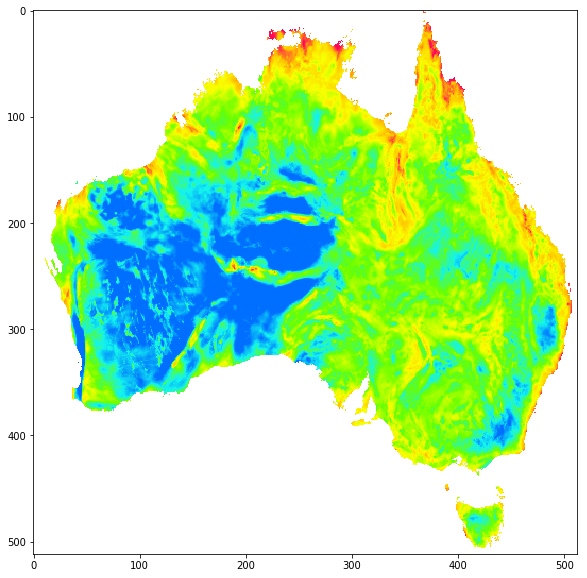

In [12]:
im = Image.open(pngfile)
plt.figure(figsize=(10, 10))
plt.imshow(im)

<br>
<br>
<br>


--------
**For more information on the OGC WMS standard specifications and the Python OWSLib package:** <br/>
http://www.opengeospatial.org/standards/wms <br/>

https://geopython.github.io/OWSLib/#wms <br/>
